In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

import sys
assert sys.version_info >= (3, 6)
import sklearn
assert sklearn.__version__ >= "0.20"
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent sized plots
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize']= 14
rcParams['xtick.labelsize'] =12
rcParams['ytick.labelsize'] = 12

# handle operating system dependencies
import os

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive/Group 7 _ Final Project/")
os.getcwd()

'/content/drive/My Drive/Group 7 _ Final Project'

In [5]:
# Read the training data and test data into Dataframes
train_credit = pd.read_csv('train.csv')
test_credit = pd.read_csv('test.csv')

In [6]:
train_credit.head(20)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
5,6,1,8,4,0,3398,1,4,1,3,...,1,39,3,2,2,2,2,1,1,1
6,7,1,6,4,0,1361,1,2,2,3,...,1,40,3,2,1,2,1,1,1,1
7,8,4,18,4,3,1098,1,1,4,2,...,3,65,3,2,2,1,2,1,2,1
8,9,2,24,2,3,3758,3,1,1,2,...,4,23,3,1,1,1,2,1,2,1
9,10,1,11,4,0,3905,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1


In [7]:
train_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [8]:
# assign the corresponding english column names
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test_credit.columns =  ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [9]:
# check the dataframe after rename of the columns
train_credit.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [10]:
train_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,800.0,478.10125,278.883661,0.0,238.75,472.0,707.25,999.0
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0


In [11]:
# check info
train_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

**Calculate missing Values**

In [12]:
# explicit check for any null values in the dataframe
train_credit.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

**Outlier detection**

Outliers in column 'duration': [ 8 11 11 11 11 42 33  4 47 27 14 39  4 39  5 11 54 11 27 60 42 42 28 11
 11 39  7 27 27 20 14 60 20 27  4  4  4  7  4 11 33 14 20  8 42 20 42  7
  8  8  7  8 20 60 60 45 42 60 42 60 20 28 60 33 42 72 60 39 60 27 60 42
 60 27 20 54 14]


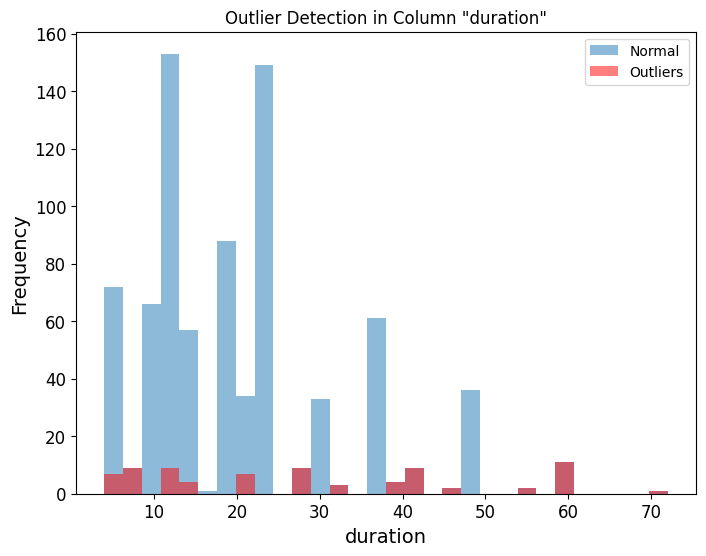

Outliers in column 'amount': [ 7582   385 10875   428   409  8858   392 12749  8072  8487  7721 12169
 10722  8613  8588  7678  8133   339  9436   250  7758   343 13756   276
   458   522 11760  7814  9566  8358  9857   362 10222  9055 12204 10623
  9277  7882 15857   368   484 10144   454 15653  8471  8947 11054  9157
  9283  7596 10974  7865  8229  7685 14555  8386   433 15672 10961 11938
 14782 12612  9398   433  7763  9034 14027  9629 12976 14421 10127 12389
 15945  8648   448 11998 18424  8978 12579 12680]


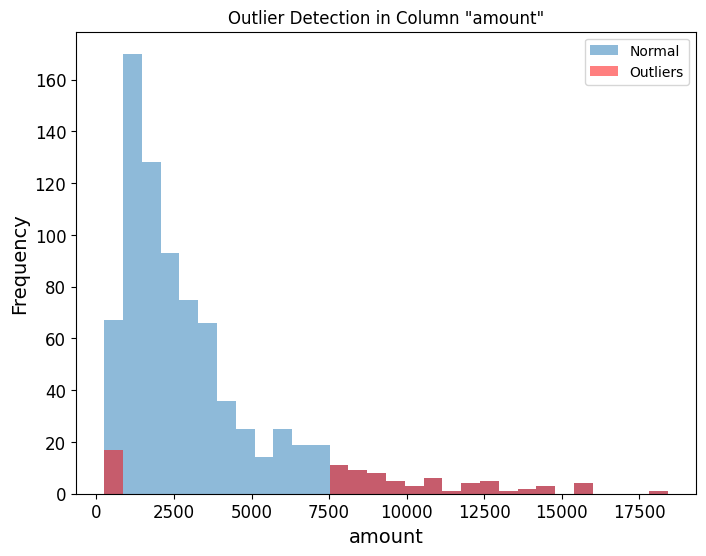

Outliers in column 'age': [21 65 56 58 61 58 63 60 58 60 63 59 61 64 74 74 64 74 20 20 19 65 63 63
 59 61 57 63 66 64 57 68 57 21 66 70 60 57 67 56 20 20 20 21 66 75 63 64
 20 21 21 57 67 20 65 21 61 63 21 66 58 60 61 61 63 19 60 21 57 20 57 61
 58 20 20]


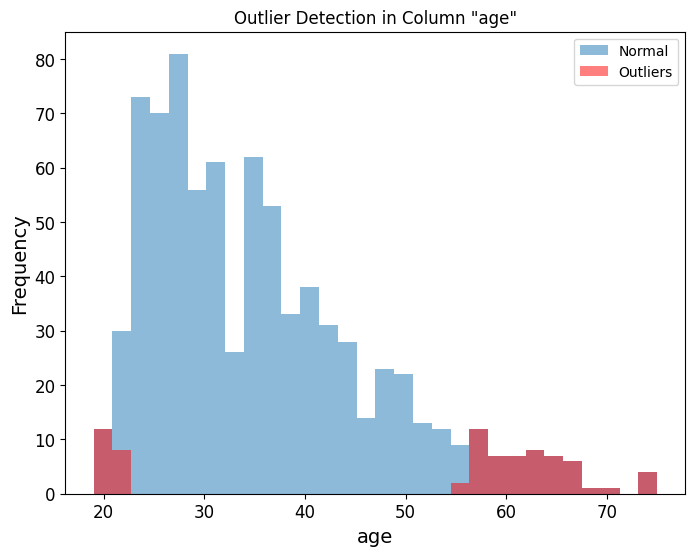

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

train_credit = pd.read_csv('train.csv')
train_credit.columns = ['Id', 'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

# Define a list of numerical columns
numerical_columns = ['duration', 'amount', 'age']

# Perform outlier detection for each numerical column
for col in numerical_columns:
    # Extract the column values as a numpy array
    column_values = train_credit[col].values.reshape(-1, 1)

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(column_values)

    # Predict outliers
    outliers = clf.predict(column_values)

    # Identify and print the outliers
    outlier_indices = np.where(outliers == -1)[0]
    outlier_values = column_values[outlier_indices].flatten()
    print(f"Outliers in column '{col}': {outlier_values}")

    # Visualize the outliers
    plt.figure(figsize=(8, 6))
    plt.hist(column_values, bins=30, alpha=0.5, label='Normal')
    plt.hist(outlier_values, bins=30, alpha=0.5, color='red', label='Outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Outlier Detection in Column "{col}"')
    plt.legend()
    plt.show()


In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest


train_credit = pd.read_csv('train.csv')
train_credit.columns = ['Id', 'status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

# Define a list of numerical columns
numerical_columns = ['duration', 'amount', 'age']

# Dictionary to store the number of outliers in each numerical column
outliers_count = {}

# Perform outlier detection for each numerical column
for col in numerical_columns:
    # Extract the column values as a numpy array
    column_values = train_credit[col].values.reshape(-1, 1)

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(column_values)

    # Predict outliers
    outliers = clf.predict(column_values)

    # Count the number of outliers
    num_outliers = np.sum(outliers == -1)
    outliers_count[col] = num_outliers

# Print the number of outliers in each numerical column
print("Number of outliers in each numerical column:")
for col, count in outliers_count.items():
    print(f"Column '{col}': {count} outliers")


Number of outliers in each numerical column:
Column 'duration': 77 outliers
Column 'amount': 80 outliers
Column 'age': 75 outliers


**Descriptive Analysis**

---



**Distribution of credit Risk**

<ipython-input-15-1b80ab2c43ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)


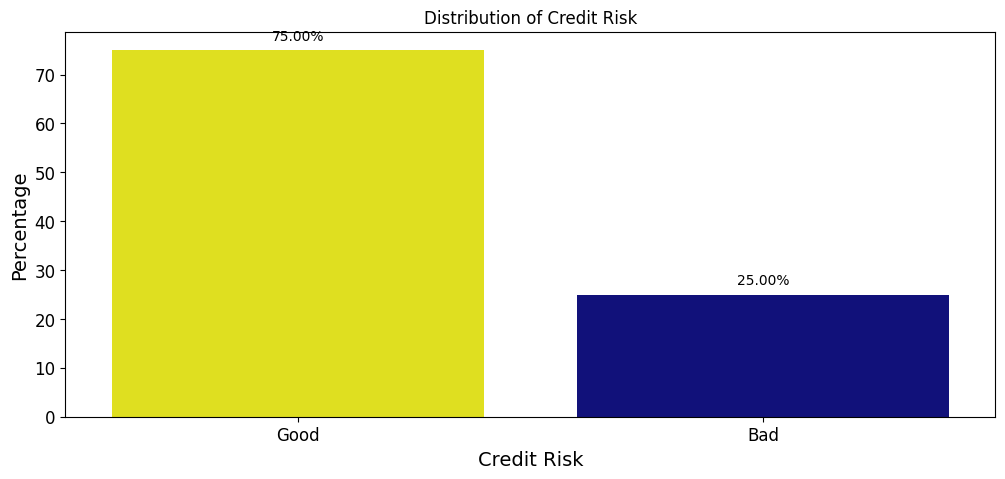

In [15]:
# Define custom color palette
custom_palette = sns.color_palette(["yellow", "darkblue"])

train_credit['credit_risk_label'] = train_credit['credit_risk'].map({0: 'Bad', 1: 'Good'})

# Calculate percentage of each category
percentage_data = train_credit['credit_risk_label'].value_counts(normalize=True) * 100

# Plotting the bar plot with custom palette
ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)
plt.xlabel('Credit Risk')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Risk')
# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

* As expected there are way more people with good credit compare to bad credit risk

* The dataset is not balanced and accuracy of the model won't be good indication unless trained with balanced data

**Distribution of status**

<ipython-input-16-3f66b057b79a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_status = sns.barplot(x=percentage_data_status.index, y=percentage_data_status.values, palette=custom_palette_status)


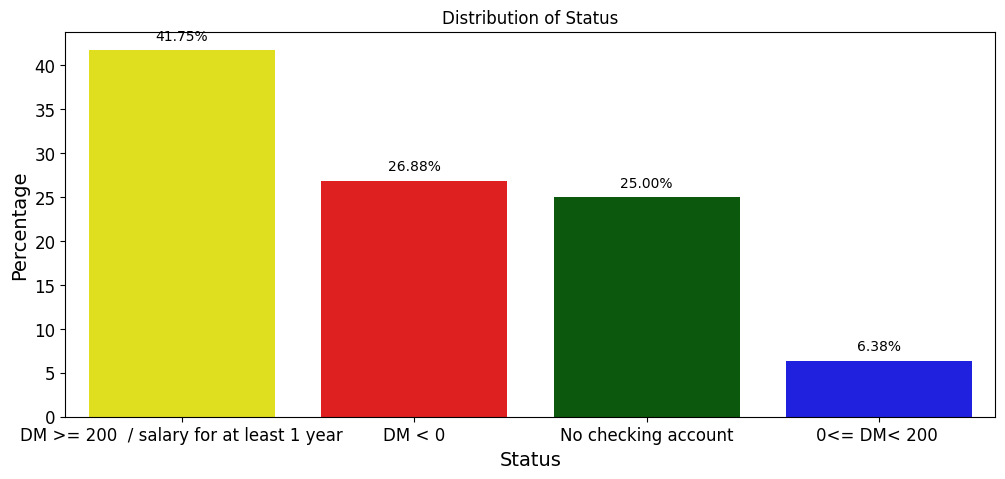

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette with dark green and blue
custom_palette_status = sns.color_palette(["yellow", "red","darkgreen","blue"])

train_credit['status_label'] = train_credit['status'].map({
    1: 'No checking account',
    2: 'DM < 0',
    3: '0<= DM< 200 ',
    4: 'DM >= 200  / salary for at least 1 year'
})

# Calculate percentage of each status category
percentage_data_status = train_credit['status_label'].value_counts(normalize=True) * 100

# Plotting the bar plot for status with custom palette
ax_status = sns.barplot(x=percentage_data_status.index, y=percentage_data_status.values, palette=custom_palette_status)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title('Distribution of Status')
# Adding percentage labels to the bars
for p in ax_status.patches:
    ax_status.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Distribution of foreign_worker**

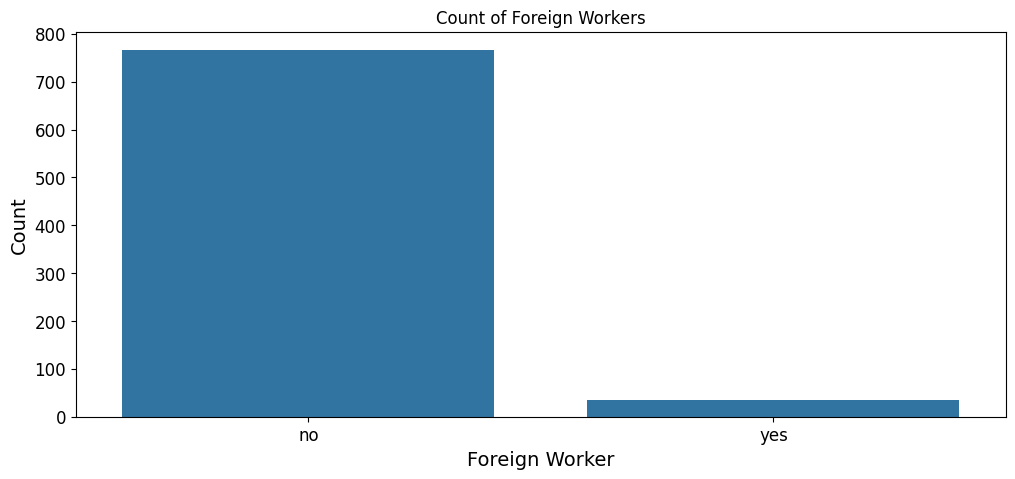

In [17]:
train_credit['foreign_worker_label'] = train_credit['foreign_worker'].map({1: 'yes', 2: 'no'})

# Creating the count plot for foreign worker labels
sns.countplot(x='foreign_worker_label', data=train_credit)
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.title('Count of Foreign Workers')
plt.show()

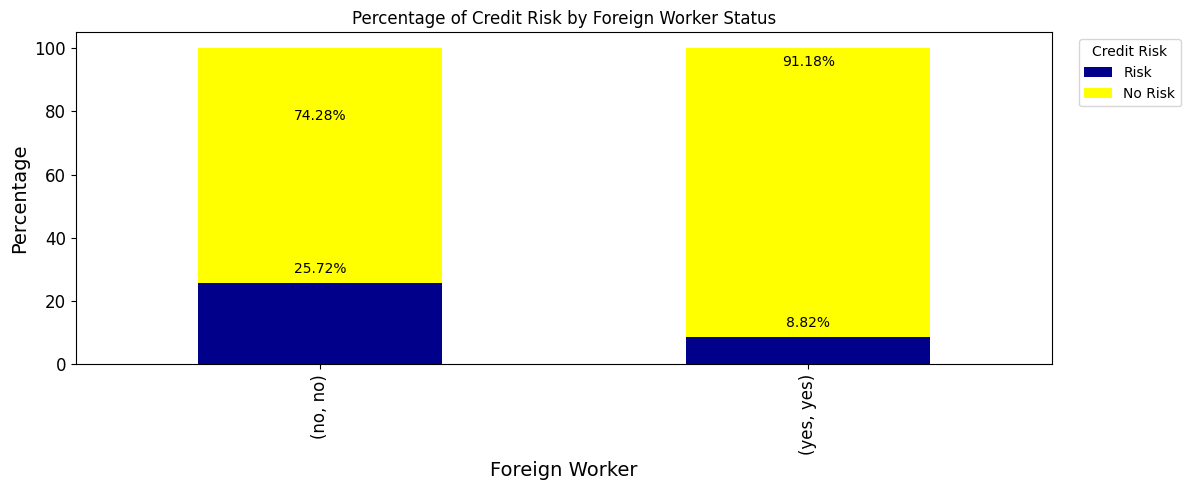

In [18]:
train_credit['foreign_worker_label'] = train_credit['foreign_worker'].map({1: 'yes', 2: 'no'})

# Calculate percentage of each category for each credit risk type
percentage_data = train_credit.groupby(['foreign_worker_label', 'credit_risk']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plotting the bar plot with custom palette
ax = percentage_data.plot(kind='bar', stacked=True, color=["darkblue", "yellow"])
plt.xlabel('Foreign Worker')
plt.ylabel('Percentage')
plt.title('Percentage of Credit Risk by Foreign Worker Status')

# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding legend to the top right
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'], bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

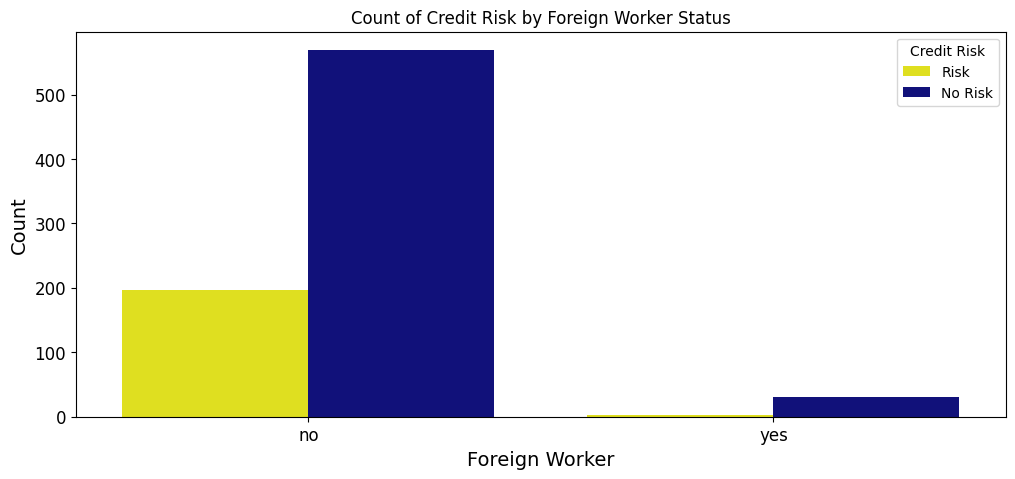

In [19]:
train_credit['foreign_worker_label'] = train_credit['foreign_worker'].map({1: 'yes', 2: 'no'})
custom_palette = sns.color_palette(["yellow", "darkblue"])

# Creating the count plot
sns.countplot(x='foreign_worker_label', hue='credit_risk', data=train_credit,palette=custom_palette)
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Foreign Worker Status')
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'])
plt.show()

**Credit Risk vs Status**

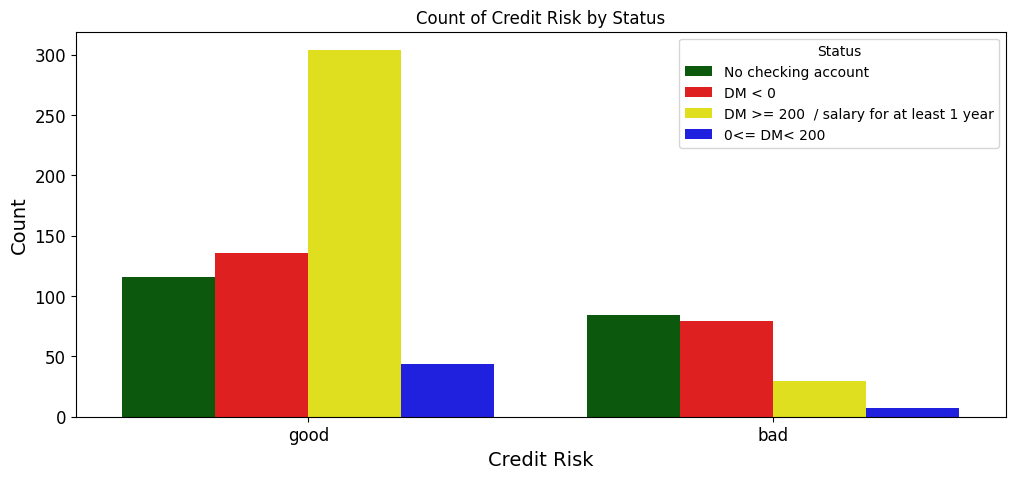

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette with darkgreen, red, yellow, and blue
custom_palette_status = sns.color_palette(["darkgreen", "red", "yellow", "blue"])

train_credit['credit_risk_label'] = train_credit['credit_risk'].map({0: 'bad', 1: 'good'})

# Mapping for the 'status' variable
status_mapping = {
    1: 'No checking account',
    2: 'DM < 0',
    3: '0<= DM< 200 ',
    4: 'DM >= 200  / salary for at least 1 year'
}
train_credit['status_label'] = train_credit['status'].map(status_mapping)

# Creating the count plot with hue for status using custom palette
sns.countplot(x='credit_risk_label', hue='status_label', data=train_credit, palette=custom_palette_status)
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Status')
plt.legend(title='Status')
plt.show()


**Credit Risk vs Purpose**

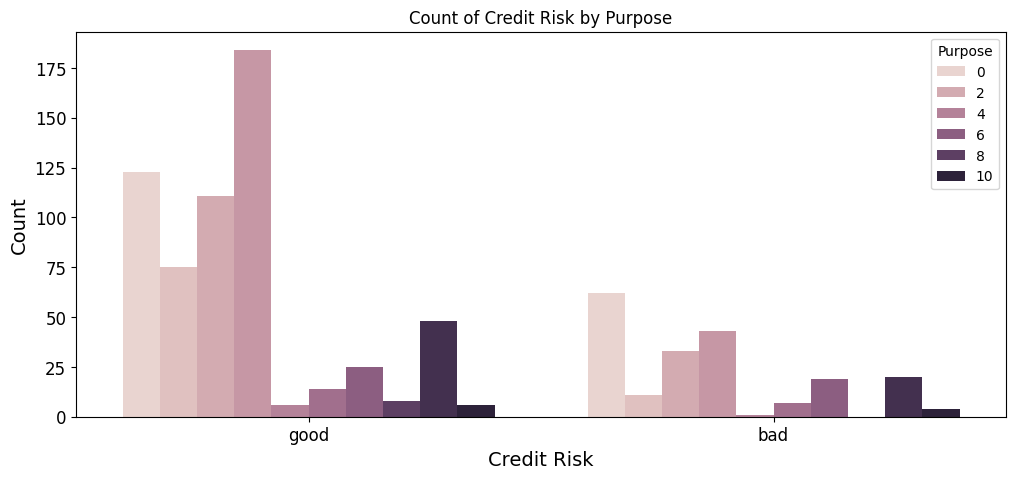

In [21]:
train_credit['credit_risk_label'] = train_credit['credit_risk'].map({0: 'bad', 1: 'good'})

# Creating the count plot
sns.countplot(x='credit_risk_label', hue='purpose', data=train_credit)
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Purpose')
plt.legend(title='Purpose')
plt.show()

**Distribution of Amount**

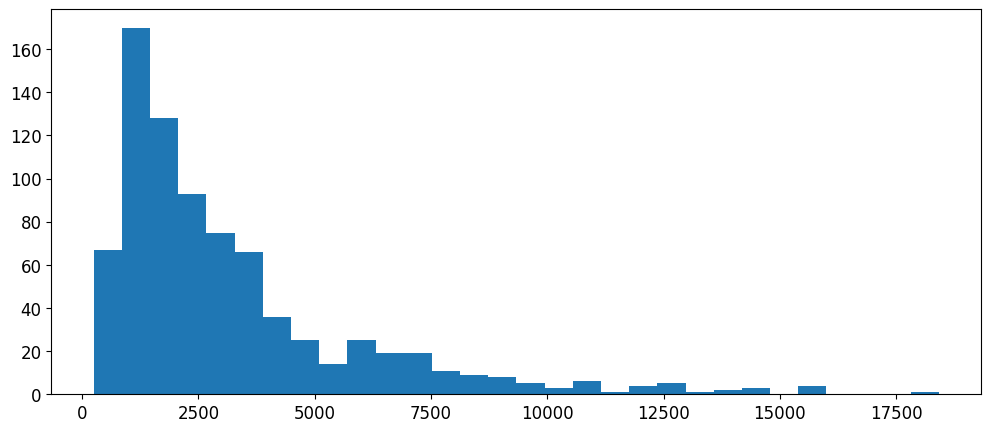

In [22]:
plt.hist(train_credit['amount'],bins=30);

Check the bad loans

In [23]:
train_credit[train_credit['credit_risk']==0]

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_risk_label,status_label,foreign_worker_label
600,45,1,18,2,0,1216,1,2,4,2,...,1,1,3,2,2,2,0,bad,No checking account,no
601,47,4,18,4,6,1864,2,3,4,2,...,2,2,3,2,1,2,0,bad,DM >= 200 / salary for at least 1 year,no
602,171,1,12,2,0,1228,1,3,4,2,...,2,1,2,2,1,2,0,bad,No checking account,no
603,234,2,12,2,0,685,1,4,2,4,...,2,1,2,2,1,2,0,bad,DM < 0,no
604,304,3,9,2,3,745,1,3,3,2,...,2,1,2,2,1,2,0,bad,0<= DM< 200,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,3,3,2,2,2,0,bad,No checking account,no
796,994,1,12,0,3,6199,1,3,4,3,...,1,2,3,2,2,2,0,bad,No checking account,no
797,997,4,21,4,0,12680,5,5,4,3,...,3,1,4,2,2,2,0,bad,DM >= 200 / salary for at least 1 year,no
798,998,2,12,2,3,6468,5,1,2,3,...,2,1,4,2,2,2,0,bad,DM < 0,no


Bad Loans Amont Histogram

Text(0.5, 1.0, 'Bad Loans Amount Histogram')

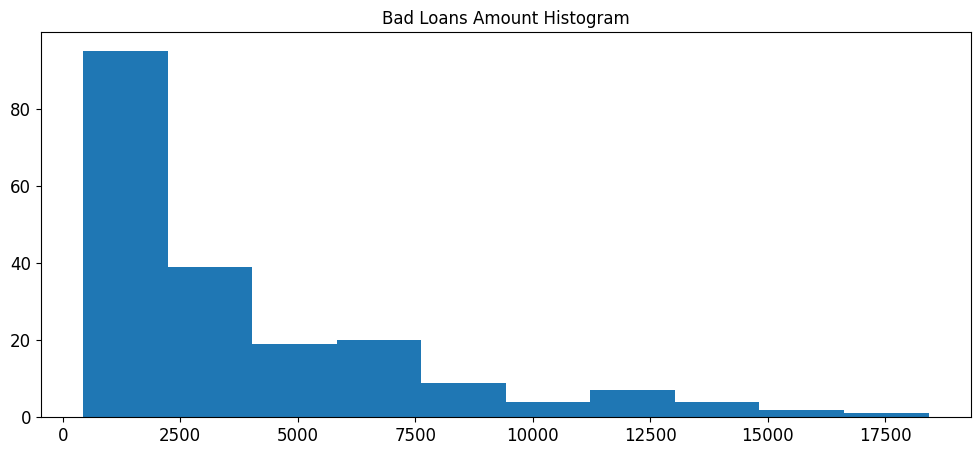

In [24]:
plt.hist(train_credit[train_credit['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')

* The badloans is right skewed and with maximum bad loans under 7500
* Highest bad loan could be for the business (can be checked quickly)

In [25]:
# check the good and bad loan risk
train_credit['credit_risk'].value_counts()

credit_risk
1    600
0    200
Name: count, dtype: int64

In [26]:
# drop the Id column as it is not useful for the model
train_credit.drop(['Id'],inplace=True,axis=1)

In [27]:
train_credit.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,credit_risk_label,status_label,foreign_worker_label
0,1,18,4,2,1049,1,2,4,2,1,...,1,1,3,2,1,2,1,good,No checking account,no
1,1,9,4,0,2799,1,3,2,3,1,...,1,2,3,1,1,2,1,good,No checking account,no
2,2,12,2,9,841,2,4,2,2,1,...,1,1,2,2,1,2,1,good,DM < 0,no


<ipython-input-28-e87ea255cf4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_amount,bins=20)


<Axes: xlabel='amount', ylabel='Density'>

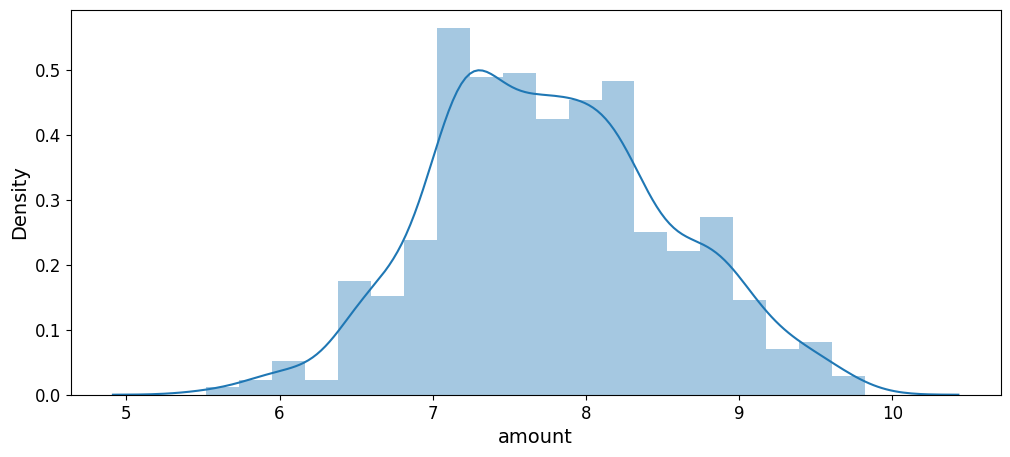

In [28]:
log_amount = np.log(train_credit['amount'])
sns.distplot(log_amount,bins=20)

In [29]:
for i in train_credit.columns:
    print(train_credit[i].value_counts())

status
4    334
2    215
1    200
3     51
Name: count, dtype: int64
duration
24    149
12    140
18     88
6      65
36     61
15     53
9      41
48     36
30     33
10     25
21     25
60     11
11      9
42      9
27      7
20      7
4       6
8       5
14      4
39      4
13      4
7       4
33      3
22      2
54      2
28      2
47      1
5       1
16      1
45      1
72      1
Name: count, dtype: int64
credit_history
2    408
4    250
3     70
1     40
0     32
Name: count, dtype: int64
purpose
3     227
0     185
2     144
1      86
9      68
6      44
5      21
10     10
8       8
4       7
Name: count, dtype: int64
amount
1262    3
1478    3
1258    3
1393    3
1743    2
       ..
2404    1
1554    1
1283    1
1747    1
6350    1
Name: count, Length: 754, dtype: int64
savings
1    470
5    149
2     86
3     52
4     43
Name: count, dtype: int64
employment_duration
3    258
5    207
4    145
2    137
1     53
Name: count, dtype: int64
installment_rate
4    379
2    183
3    

In [30]:
train_credit.drop('credit_risk_label',axis=1,inplace=True)
train_credit.drop('foreign_worker_label',axis=1,inplace=True)
train_credit.drop('status_label',axis=1,inplace=True)

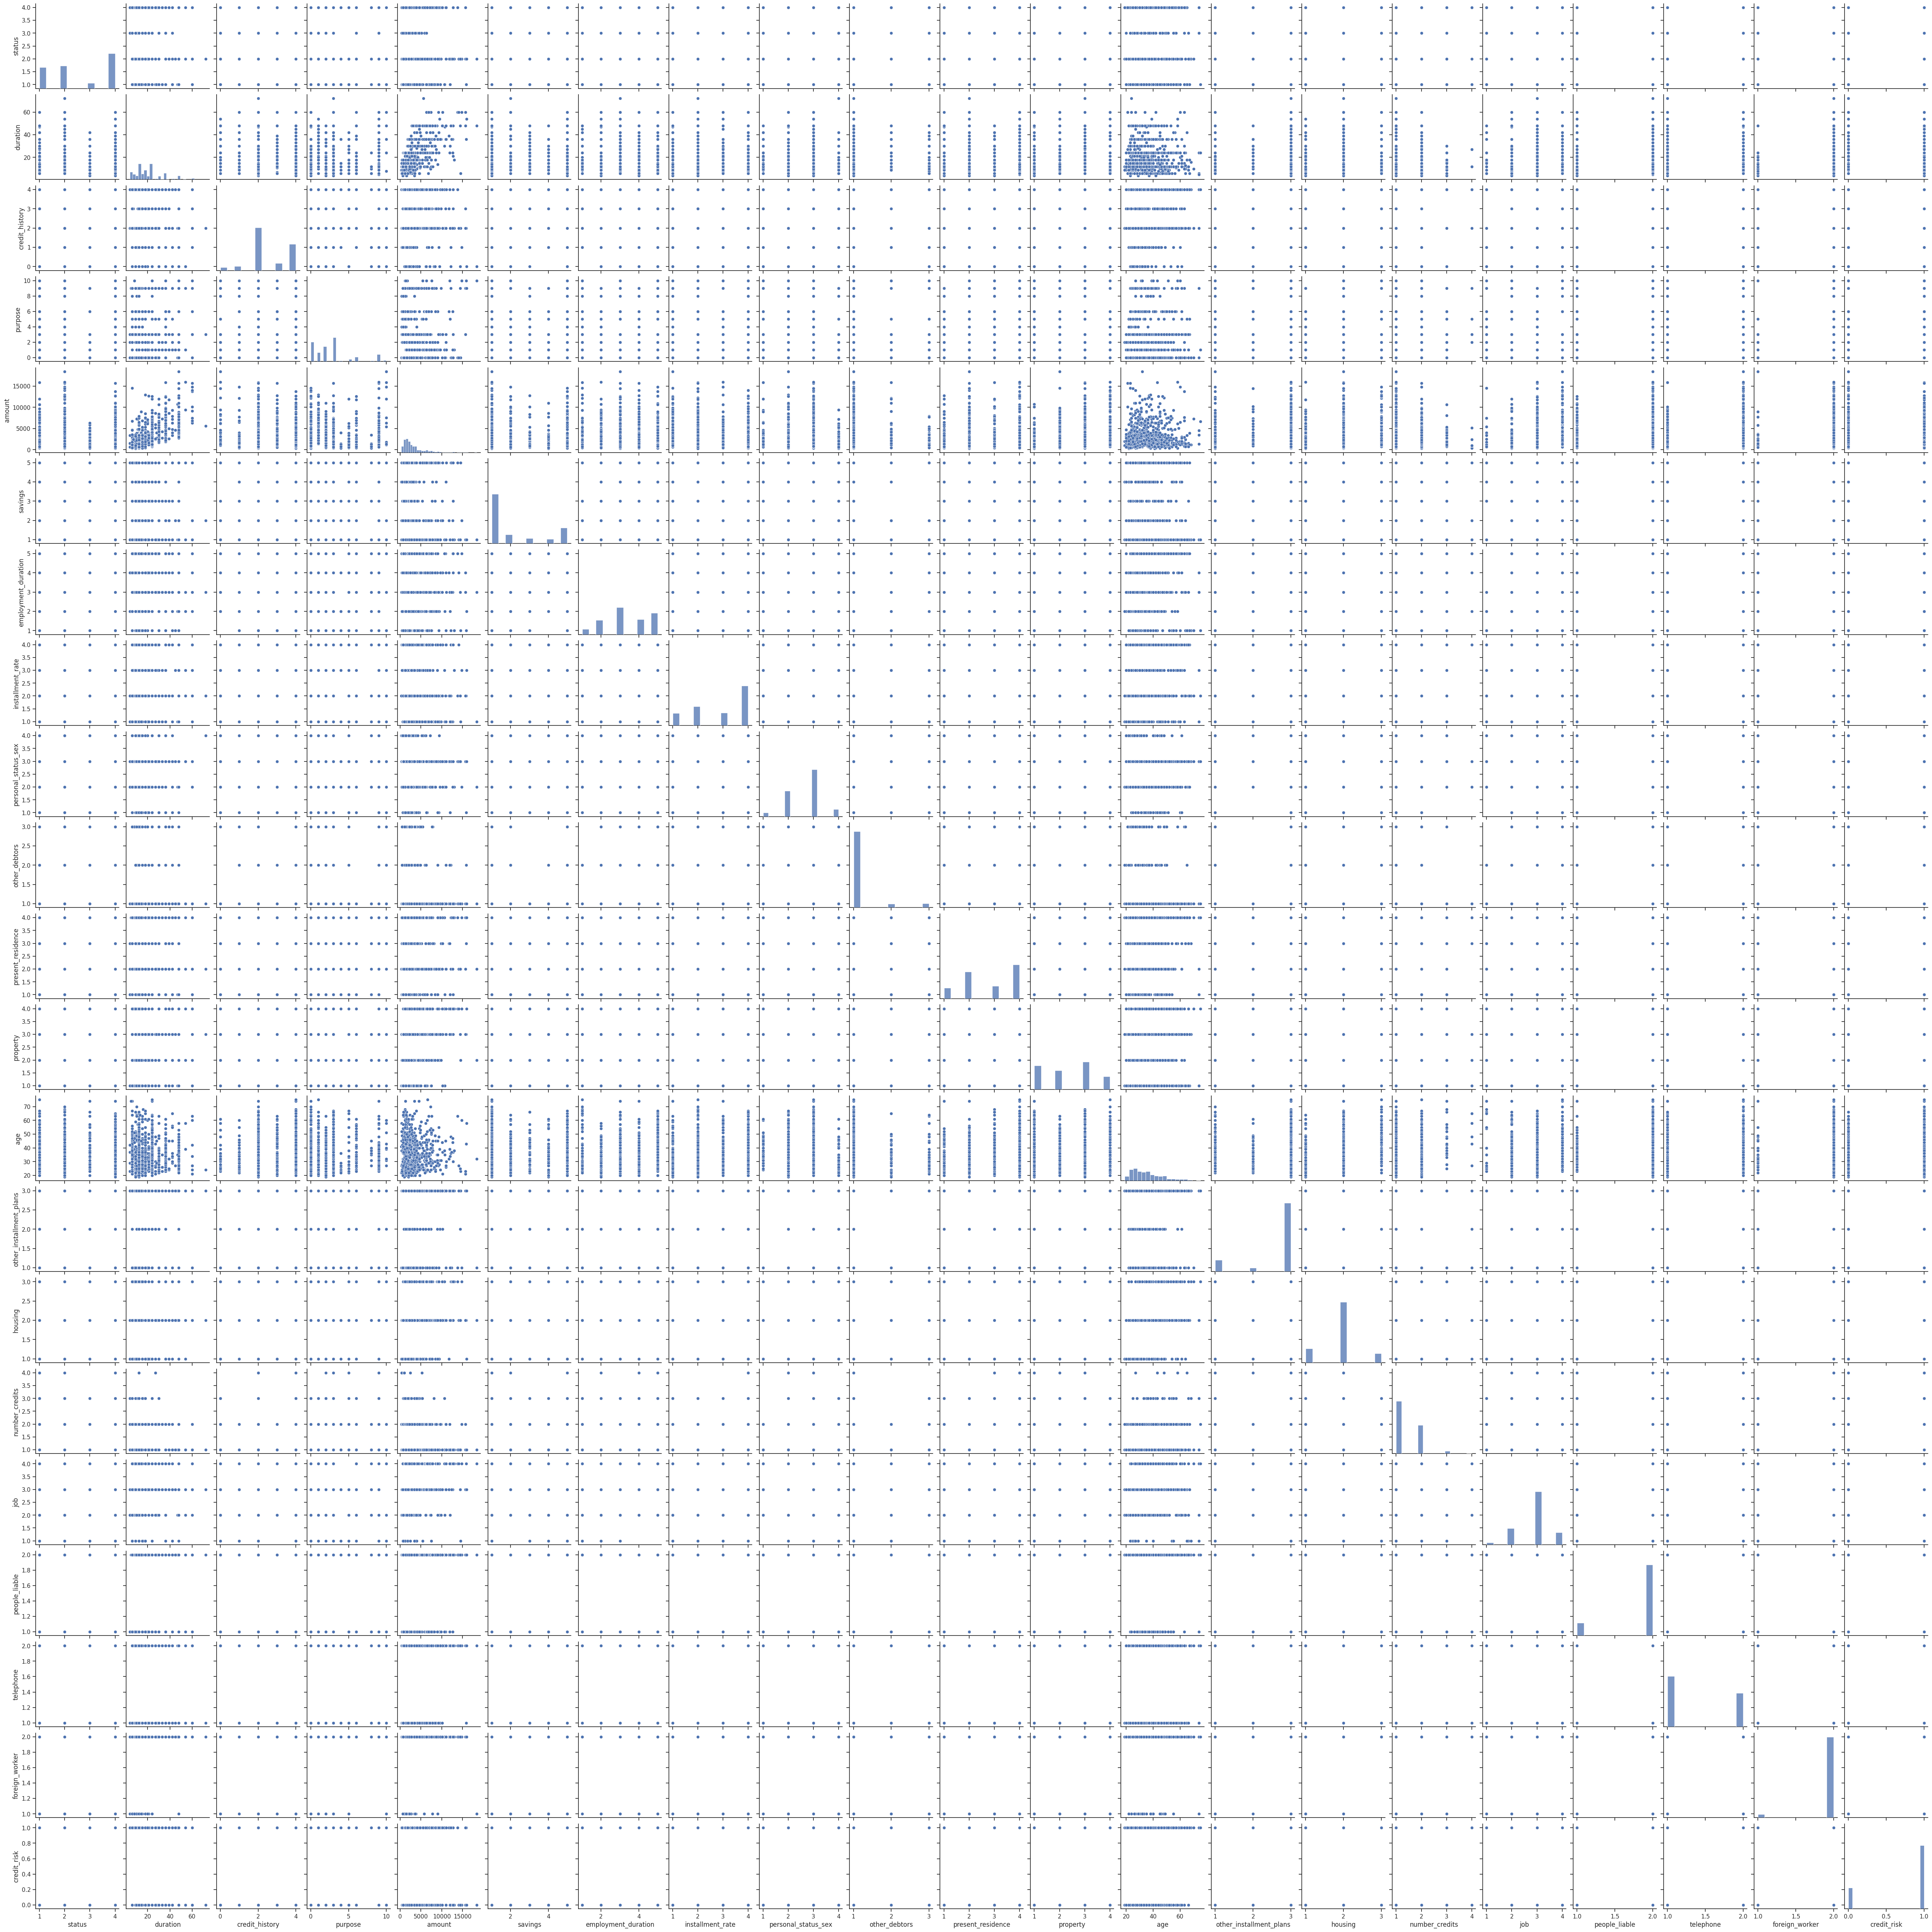

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_credit)

**checking feature correlation**

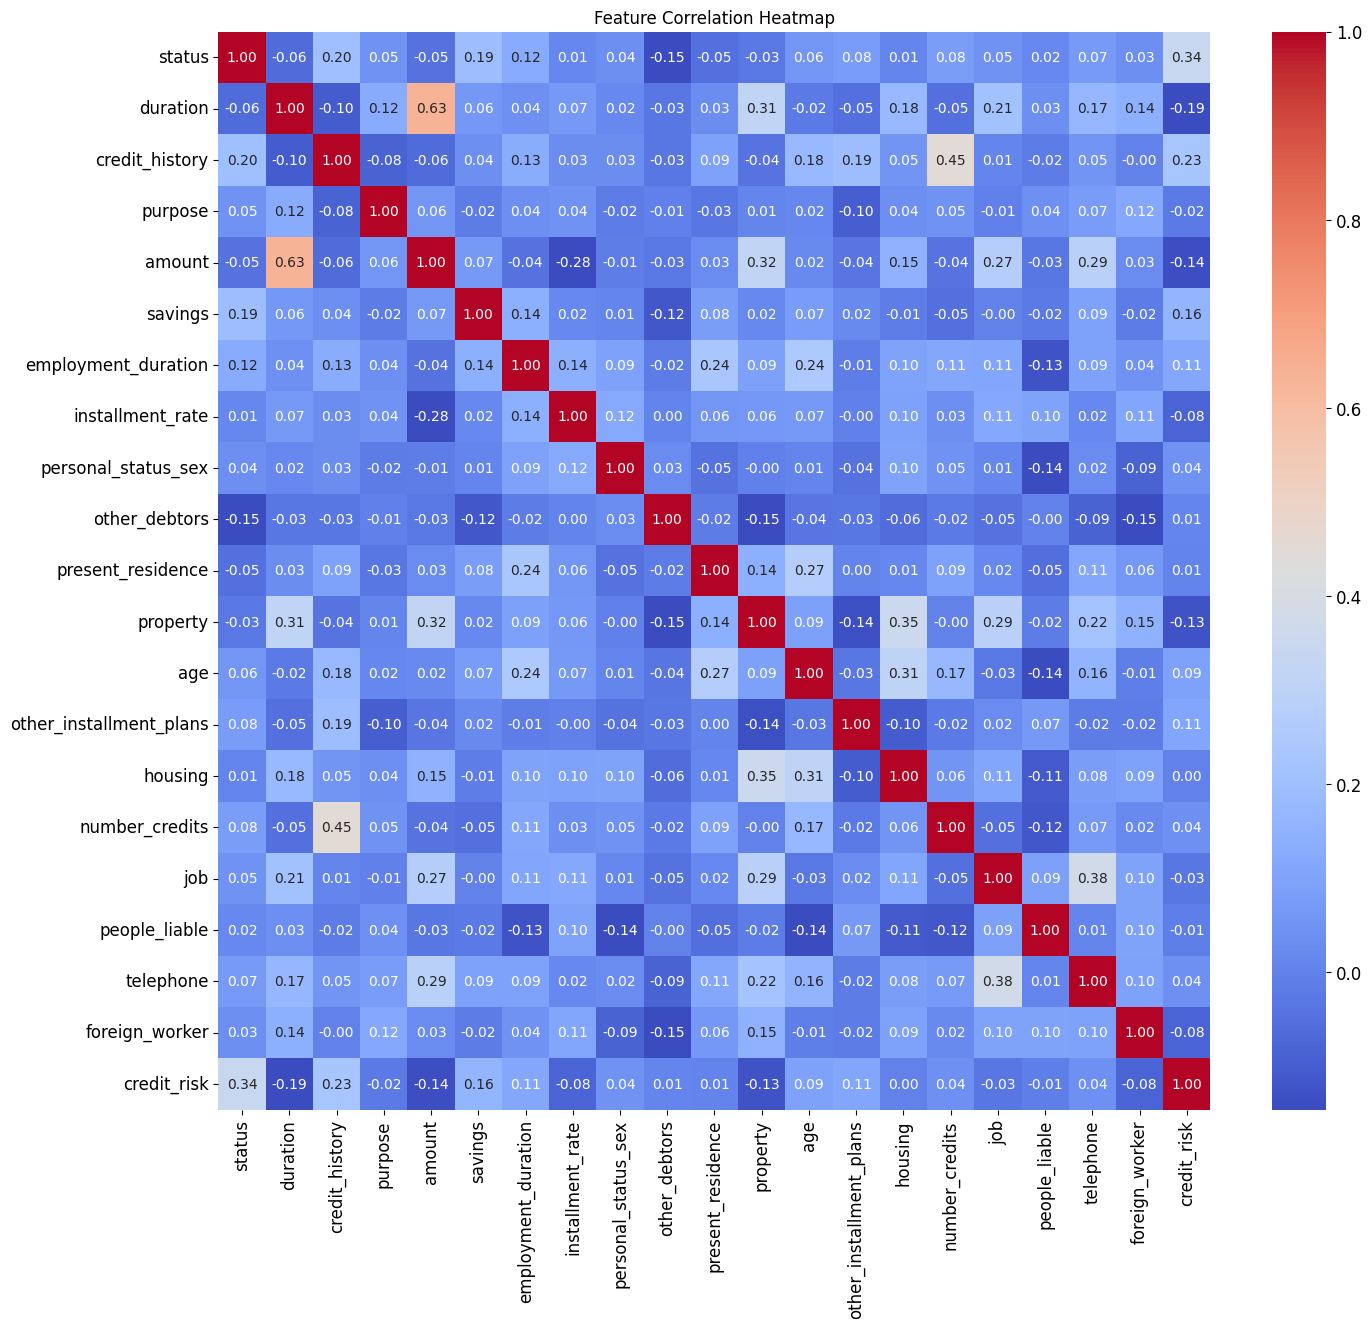

In [31]:
# checking feature correlation
plt.figure(figsize=(16, 14))
sns.heatmap(train_credit.corr(), annot=True, cmap='coolwarm', fmt=".2f", robust=True)
plt.title('Feature Correlation Heatmap')
plt.show()

Columns having least correlation with target column -

* present_residence
* housing
* other_installment_plans

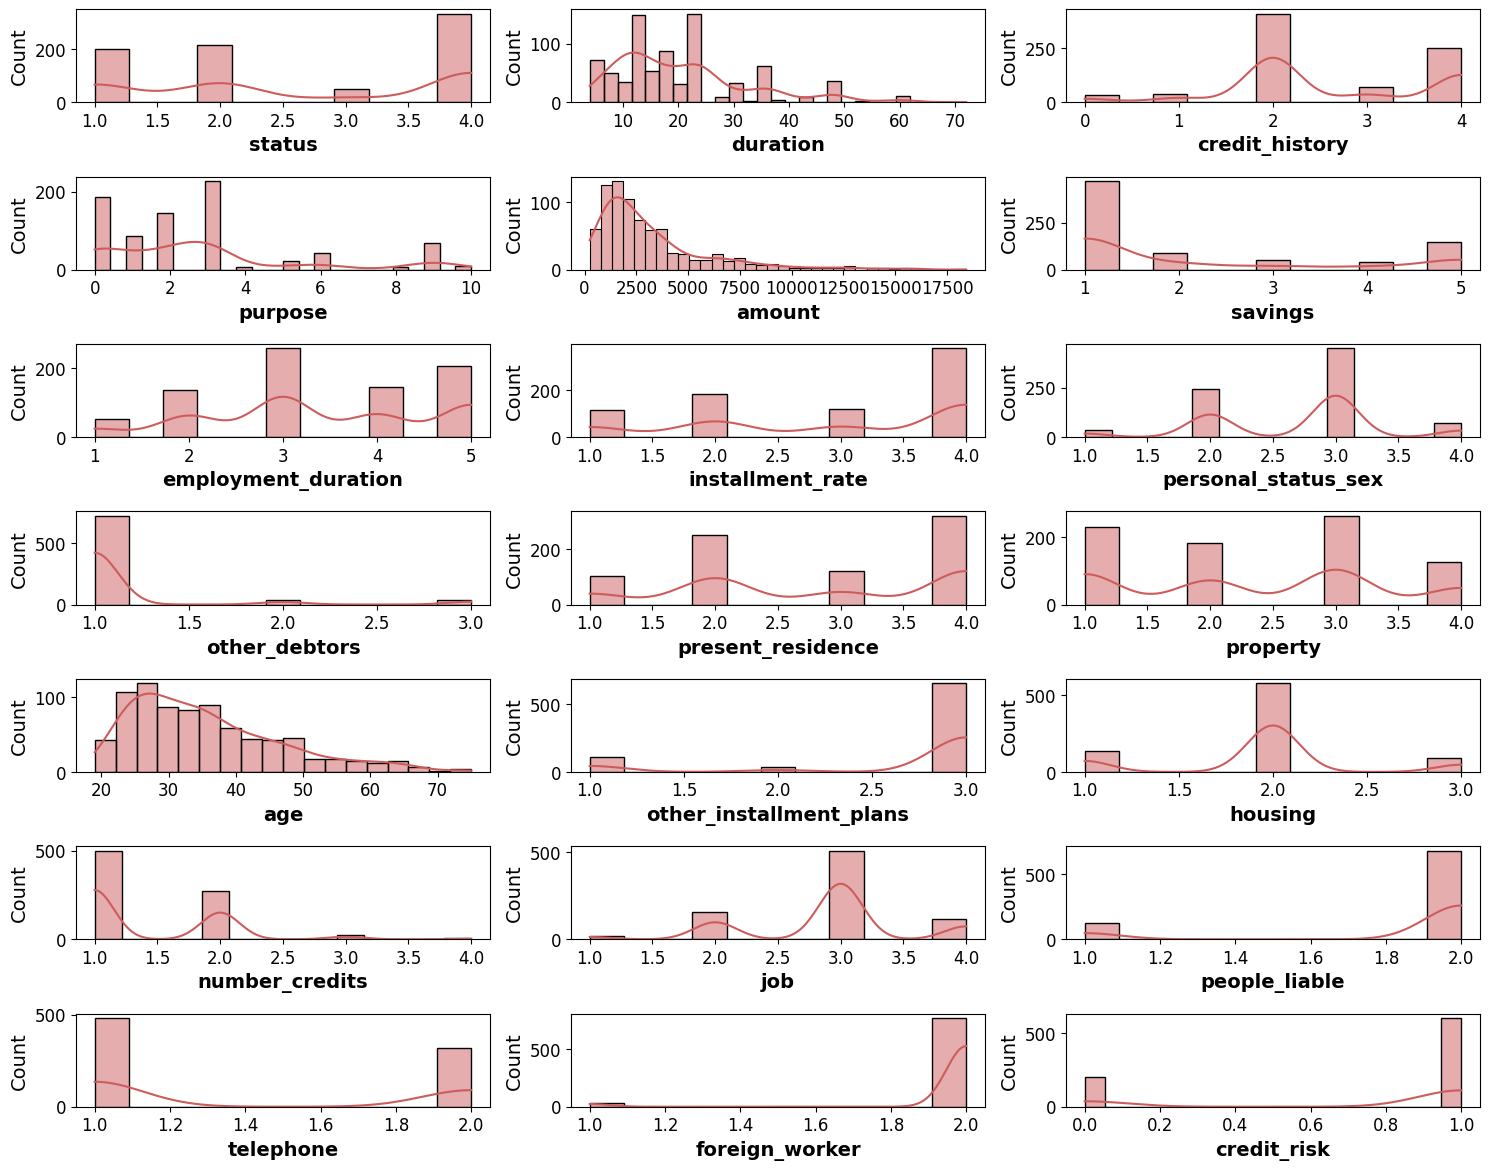

In [32]:
# feature distribution

plt.figure(figsize=(15, 100))  # Set the overall figure size

for i, col in enumerate(train_credit.columns):
    plt.subplot(60, 3, i+1)  # Create a subplot for each column
    sns.histplot(train_credit[col], color='indianred', kde=True)  # Use sns.histplot for newer versions of Seaborn
    plt.xlabel(col, weight='bold')  # Set the column name as the x-axis label
    plt.tight_layout()  # Adjust subplot parameters for better layout

plt.show()  # Show the plot

Data distribution

* Continuous and chi-distributed data columns -> "duration", "amount" and "age"
* most of data columns are multi-model and categorical

In [33]:
test_credit.shape

(200, 22)

In [34]:
test_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   duration                 200 non-null    int64
 3   credit_history           200 non-null    int64
 4   purpose                  200 non-null    int64
 5   amount                   200 non-null    int64
 6   savings                  200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   installment_rate         200 non-null    int64
 9   personal_status_sex      200 non-null    int64
 10  other_debtors            200 non-null    int64
 11  present_residence        200 non-null    int64
 12  property                 200 non-null    int64
 13  age                      200 non-null    int64
 14  other_installment_plans  200 non-null    int64
 15  housin

In [35]:
test_credit.head()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,4,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,3,23,3,1,2,2,2,1,2,1
2,18,2,36,4,3,2337,1,5,4,3,...,1,36,3,2,1,3,2,1,2,1
3,20,1,6,4,0,3676,1,3,1,3,...,1,37,3,1,3,3,1,1,2,1
4,22,2,36,2,5,2384,1,2,4,3,...,4,33,3,1,1,2,2,1,2,1


In [36]:
test_credit.describe()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,585.095000,2.290000,22.530000,2.395000,3.000000,3515.080000,1.950,3.340000,3.055000,2.660000,...,2.375000,35.540000,2.68000,1.875000,1.355000,2.915000,1.845000,1.425000,1.985000,1.0
std,311.895834,1.246462,12.158877,1.001995,2.987411,2933.884667,1.536,1.144969,1.052384,0.753151,...,1.024511,12.063834,0.69282,0.539286,0.538913,0.624278,0.362813,0.495584,0.121857,0.0
min,4.000000,1.000000,6.000000,0.000000,0.000000,338.000000,1.000,1.000000,1.000000,1.000000,...,1.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,303.000000,1.000000,12.000000,2.000000,1.000000,1373.500000,1.000,3.000000,2.000000,2.000000,...,1.000000,26.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.0
50%,661.000000,2.000000,19.000000,2.000000,2.000000,2443.000000,1.000,3.000000,3.000000,3.000000,...,2.000000,33.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.0
75%,857.500000,4.000000,30.000000,3.000000,3.000000,4572.500000,2.250,4.000000,4.000000,3.000000,...,3.000000,41.250000,3.00000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.0
max,996.000000,4.000000,60.000000,4.000000,10.000000,14896.000000,5.000,5.000000,4.000000,4.000000,...,4.000000,75.000000,3.00000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.0


In [37]:
for i in test_credit.columns:
    print(test_credit[i].value_counts())

Id
4      1
833    1
796    1
798    1
800    1
      ..
444    1
456    1
462    1
472    1
996    1
Name: count, Length: 200, dtype: int64
status
1    74
4    60
2    54
3    12
Name: count, dtype: int64
duration
12    39
24    35
18    25
36    22
48    12
15    11
6     10
9      8
30     7
27     6
21     5
45     4
10     3
42     2
60     2
8      2
40     1
7      1
28     1
26     1
20     1
39     1
16     1
Name: count, dtype: int64
credit_history
2    122
4     43
3     18
1      9
0      8
Name: count, dtype: int64
purpose
3     53
0     49
2     37
9     29
1     17
6      6
4      5
10     2
5      1
8      1
Name: count, dtype: int64
amount
1344     2
1845     2
2171     1
7980     1
1908     1
        ..
14179    1
618      1
2629     1
3812     1
2303     1
Name: count, Length: 198, dtype: int64
savings
1    133
5     34
2     17
3     11
4      5
Name: count, dtype: int64
employment_duration
3    81
5    46
2    35
4    29
1     9
Name: count, dtype: int64
installmen

In [38]:
x_test = test_credit.drop(columns="Id",axis=1)

In [39]:
x_test.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
1,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
2,2,36,4,3,2337,1,5,4,3,1,...,1,36,3,2,1,3,2,1,2,1
3,1,6,4,0,3676,1,3,1,3,1,...,1,37,3,1,3,3,1,1,2,1
4,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,1


### **Prepare data for Machine Learning Models**

*     age can be converted to ordinal data, for simplicity went with log transformation
*     further improvement --> create data preparation and transformation pipeline

In [40]:
# import the various classifier models

from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold

In [41]:
new_data = train_credit.copy()

In [42]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [43]:
new_data['log_amount'] = round(np.log(new_data['amount']),2)

In [44]:
new_data.drop('amount',axis=1,inplace=True)

In [45]:
new_data['log_age'] =  round(np.log(new_data['age']),2)
new_data['log_duration'] = round(np.log(new_data['duration']),2)
new_data.drop(['age','duration'],axis=1,inplace=True)
new_data.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,2,1,2,4,2,1,4,2,...,1,1,3,2,1,2,1,6.96,3.04,2.89
1,1,4,0,1,3,2,3,1,2,1,...,1,2,3,1,1,2,1,7.94,3.58,2.20
2,2,2,9,2,4,2,2,1,4,1,...,1,1,2,2,1,2,1,6.73,3.14,2.48
3,1,4,0,1,3,3,3,1,2,1,...,1,2,2,1,1,1,1,7.66,3.66,2.48
4,1,4,0,1,2,1,3,1,3,1,...,1,2,2,1,1,1,1,7.71,3.87,2.30


In [46]:
new_data.tail()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
795,1,4,0,1,5,1,2,1,4,1,...,1,3,3,2,2,2,0,8.29,3.50,2.89
796,1,0,3,1,3,4,3,1,2,2,...,1,2,3,2,2,2,0,8.73,3.33,2.48
797,4,4,0,5,5,4,3,1,4,4,...,3,1,4,2,2,2,0,9.45,3.40,3.04
798,2,2,3,5,1,2,3,1,1,4,...,2,1,4,2,2,2,0,8.77,3.95,2.48
799,1,2,2,5,5,4,3,1,4,2,...,2,1,3,2,1,2,0,8.76,3.43,3.40


In [47]:
X_full = new_data.drop('credit_risk',axis=1)
y_full = new_data['credit_risk']

* The data is organized where the last 200 rows has credit risk as 0
* Hence it is important to shuffle the dataset

In [48]:
# this will ensure that the data is randomized and then split into train and test
# alternatively StratifiedRandomSplit is also recommended
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [49]:
# try various models and pick the best one for further tuning
def cross_validate(X = X_train,y = y_train):

    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))


    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [50]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7770833333333333,Std Dev: 0.03174948052943369
Model:GB,Mean: 0.7786458333333334,Std Dev: 0.043839813565664514
Model:SVC,Mean: 0.7572916666666667,Std Dev: 0.016503103664327976
Model:SGD,Mean: 0.6848958333333334,Std Dev: 0.12009133712917107
Model:LogReg,Mean: 0.7697916666666667,Std Dev: 0.041718717488543305
Model:AdaBoost,Mean: 0.7671875,Std Dev: 0.046060634290573985
Model:Bag,Mean: 0.7463541666666667,Std Dev: 0.044685557455836765
Model:xgboost,Mean: 0.765625,Std Dev: 0.04670106619054145
Model:Dtree,Mean: 0.7166666666666667,Std Dev: 0.053784711014273276


**Prepare the test data**

In [51]:
test_sub = test_credit.copy()
test_sub.drop('Id',axis=1,inplace=True)
test_sub['log_amount'] = round(np.log(test_sub['amount']),2)
test_sub['log_age'] =  round(np.log(test_sub['age']),2)
test_sub['log_duration'] = round(np.log(test_sub['duration']),2)
test_sub.drop(['amount','age','duration'],axis=1,inplace=True)
test_sub.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,0,1,3,4,3,1,4,2,...,2,2,2,2,1,1,1,7.68,3.64,2.48
1,1,2,3,5,4,2,4,1,4,3,...,1,2,2,2,1,2,1,7.57,3.14,2.89
2,2,4,3,1,5,4,3,1,4,1,...,2,1,3,2,1,2,1,7.76,3.58,3.58
3,1,4,0,1,3,1,3,1,3,1,...,1,3,3,1,1,2,1,8.21,3.61,1.79
4,2,2,5,1,2,4,3,1,1,4,...,1,1,2,2,1,2,1,7.78,3.50,3.58


In [52]:
# try various models and pick the best one for further tuning
def cross_validate(x = X_test,y = y_test):

    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))


    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,x,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [53]:
cross_validate(X_test,y_test)

Model:RF,Mean: 0.7520833333333333,Std Dev: 0.08612511086914328
Model:GB,Mean: 0.7104166666666667,Std Dev: 0.10641327324268443
Model:SVC,Mean: 0.7208333333333333,Std Dev: 0.04768967975941499
Model:SGD,Mean: 0.7083333333333334,Std Dev: 0.12325166214790868
Model:LogReg,Mean: 0.7166666666666667,Std Dev: 0.0978057882858792
Model:AdaBoost,Mean: 0.7145833333333333,Std Dev: 0.11488596399135198
Model:Bag,Mean: 0.6833333333333333,Std Dev: 0.10324593077803224
Model:xgboost,Mean: 0.7208333333333333,Std Dev: 0.08650224788344457
Model:Dtree,Mean: 0.65,Std Dev: 0.11924240017711822


**Balance the data by Oversampling using ADASYN Library**

In [54]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # use either ADASYN or SMOTE
from collections import Counter

In [55]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)

Counter({1: 485, 0: 468})

In [56]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [57]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8534283625730994,Std Dev: 0.040716012707456374
Model:GB,Mean: 0.8216154970760235,Std Dev: 0.040365918699387215
Model:SVC,Mean: 0.7712865497076022,Std Dev: 0.030194413156052192
Model:SGD,Mean: 0.6862902046783625,Std Dev: 0.07109069672086998
Model:LogReg,Mean: 0.7551864035087716,Std Dev: 0.037619985515483456
Model:AdaBoost,Mean: 0.7611184210526317,Std Dev: 0.0394686542441786
Model:Bag,Mean: 0.8076315789473684,Std Dev: 0.044443632288093525
Model:xgboost,Mean: 0.8453764619883041,Std Dev: 0.032742472686874614
Model:Dtree,Mean: 0.746125730994152,Std Dev: 0.04391658706734451


In [58]:
X_test_res,y_test_res = ada.fit_resample(X_test,y_test)

In [59]:
cross_validate(X_test_res,y_test_res)

Model:RF,Mean: 0.846376811594203,Std Dev: 0.06616065049572943
Model:GB,Mean: 0.8115942028985508,Std Dev: 0.05760755627348344
Model:SVC,Mean: 0.8028985507246378,Std Dev: 0.07338544290534586
Model:SGD,Mean: 0.7434782608695654,Std Dev: 0.08044457441378504
Model:LogReg,Mean: 0.7898550724637681,Std Dev: 0.0683621821163522
Model:AdaBoost,Mean: 0.8115942028985509,Std Dev: 0.06182820002232329
Model:Bag,Mean: 0.781159420289855,Std Dev: 0.05991312060462141
Model:xgboost,Mean: 0.817391304347826,Std Dev: 0.05545254049191011
Model:Dtree,Mean: 0.7507246376811595,Std Dev: 0.07440868204633877


Based on the above result we will use the best models to fit and predict the score

**XGBoost**

In [60]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'learning_rate': [0.3, 0.5, 0.01, 0.1],
                          'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [61]:
grid_search.best_params_

{'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 30}

**Random Forest**

In [62]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),

    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8df832d180>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8df851f010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8df832ed10>},
                   random_state=42, scoring='accuracy')

In [63]:
rnd_search.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 386}

In [64]:
rf_clf = RandomForestClassifier(random_state=42,max_depth=8,max_features=6,n_estimators=386)

**hyper parameters selcted based on grid search** - SVM,GB,BAGGING,XGBOOST (for oversampling)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

log_reg = LogisticRegression(random_state=42)
bag_log_reg = BaggingClassifier(base_estimator=log_reg, random_state=42)

log_reg.fit(X_res, y_res)


LogisticRegression(random_state=42)

In [66]:
# hyper parameters selcted based on grid search
xgb_clf =  XGBClassifier(n_estimators=30,max_depth=8,random_state=42,learning_rate=0.3,
                        booster='gbtree')
svc_clf = SVC(random_state=42)   # with default paramters
gb_clf = GradientBoostingClassifier(random_state=42) # default parameters
bag_clf = BaggingClassifier(random_state=42,base_estimator=XGBClassifier())
xgb_clf.fit(X_res,y_res)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

log_reg = LogisticRegression(random_state=42)
bag_log_reg = BaggingClassifier(base_estimator=log_reg, random_state=42)

log_reg.fit(X_res, y_res)

LogisticRegression(random_state=42)

In [68]:
rf_clf.fit(X_res,y_res)
RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)
svc_clf.fit(X_res,y_res)
SVC(random_state=42)
gb_clf.fit(X_res,y_res)
GradientBoostingClassifier(random_state=42)
bag_clf.fit(X_res,y_res)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                  random_state=42)

**Accuracy** (After hyper parameter tuning)

In [69]:
predictions_train_xgb = xgb_clf.predict(X_train)
predictions_train_rf = rf_clf.predict(X_train)
predictions_train_svc = svc_clf.predict(X_train)
predictions_train_gb = gb_clf.predict(X_train)
predictions_train_bag = bag_clf.predict(X_train)
predictions_train_log_reg = log_reg.predict(X_train)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_train,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_train,predictions_train_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_train,predictions_train_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_train,predictions_train_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_train,predictions_train_gb)))
print('Accuracy LogisticRegression...{}'.format(accuracy_score(y_train, predictions_train_log_reg)))

Accuracy XGBoost...0.9984375
Accuracy RForest...0.9328125
Accuracy SupportVector...0.7609375
Accuracy GBoost...0.9
Accuracy Bagging...0.9
Accuracy LogisticRegression...0.7390625


In [70]:
predictions_test_xgb = xgb_clf.predict(X_test)
predictions_test_rf = rf_clf.predict(X_test)
predictions_test_svc = svc_clf.predict(X_test)
predictions_test_gb = gb_clf.predict(X_test)
predictions_test_bag = bag_clf.predict(X_test)
predictions_test_log_reg = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_test_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_test_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_test,predictions_test_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_test_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_test_gb)))
print('Accuracy LogisticRegression...{}'.format(accuracy_score(y_test, predictions_test_log_reg)))

Accuracy XGBoost...0.74375
Accuracy RForest...0.73125
Accuracy SupportVector...0.71875
Accuracy GBoost...0.70625
Accuracy Bagging...0.70625
Accuracy LogisticRegression...0.70625


**RMSE** (After hyper parameter tuning)

In [71]:
from sklearn.metrics import mean_squared_error

predictions_train_xgb = xgb_clf.predict(X_train)
predictions_train_rf = rf_clf.predict(X_train)
predictions_train_svc = svc_clf.predict(X_train)
predictions_train_gb = gb_clf.predict(X_train)
predictions_train_bag = bag_clf.predict(X_train)
predictions_train_log_reg = log_reg.predict(X_train)

# Define the RMSE function
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

print('RMSE XGBoost: {}'.format(calculate_rmse(y_train, predictions_train_xgb)))
print('RMSE RForest: {}'.format(calculate_rmse(y_train, predictions_train_rf)))
print('RMSE SupportVector: {}'.format(calculate_rmse(y_train, predictions_train_svc)))
print('RMSE GBoost: {}'.format(calculate_rmse(y_train, predictions_train_gb)))
print('RMSE Bagging: {}'.format(calculate_rmse(y_train, predictions_train_bag)))
print('RMSE LogRegression: {}'.format(calculate_rmse(y_train, predictions_train_log_reg)))

RMSE XGBoost: 0.03952847075210474
RMSE RForest: 0.2592055169165965
RMSE SupportVector: 0.48894018039019865
RMSE GBoost: 0.31622776601683794
RMSE Bagging: 0.09682458365518543
RMSE LogRegression: 0.5108204185425638


In [72]:
from sklearn.metrics import mean_squared_error

predictions_test_xgb = xgb_clf.predict(X_test)
predictions_test_rf = rf_clf.predict(X_test)
predictions_test_svc = svc_clf.predict(X_test)
predictions_test_gb = gb_clf.predict(X_test)
predictions_test_bag = bag_clf.predict(X_test)
predictions_test_log_reg = log_reg.predict(X_test)

# Define the RMSE function
def calculate_rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

print('RMSE XGBoost: {}'.format(calculate_rmse(y_test, predictions_test_xgb)))
print('RMSE RForest: {}'.format(calculate_rmse(y_test, predictions_test_rf)))
print('RMSE SupportVector: {}'.format(calculate_rmse(y_test, predictions_test_svc)))
print('RMSE GBoost: {}'.format(calculate_rmse(y_test, predictions_test_gb)))
print('RMSE Bagging: {}'.format(calculate_rmse(y_test, predictions_test_bag)))
print('RMSE LogRegression: {}'.format(calculate_rmse(y_test, predictions_test_log_reg)))

RMSE XGBoost: 0.5062114182829146
RMSE RForest: 0.518411033833193
RMSE SupportVector: 0.5303300858899106
RMSE GBoost: 0.54198708471697
RMSE Bagging: 0.48088460154178364
RMSE LogRegression: 0.54198708471697


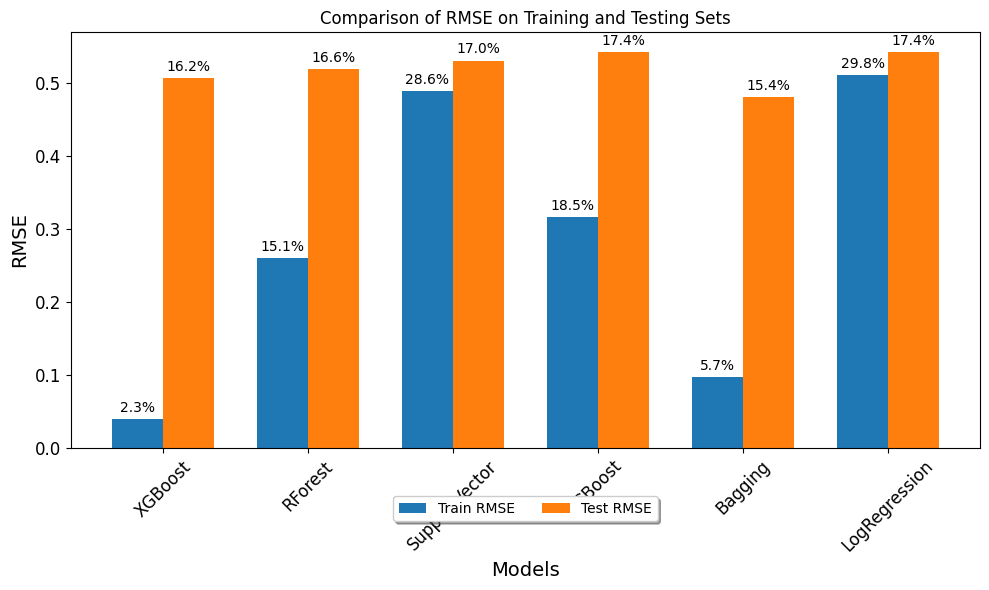

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# RMSE values for training and testing sets
rmse_train = [calculate_rmse(y_train, predictions_train_xgb),
              calculate_rmse(y_train, predictions_train_rf),
              calculate_rmse(y_train, predictions_train_svc),
              calculate_rmse(y_train, predictions_train_gb),
              calculate_rmse(y_train, predictions_train_bag),
              calculate_rmse(y_train, predictions_train_log_reg)]

rmse_test = [calculate_rmse(y_test, predictions_test_xgb),
             calculate_rmse(y_test, predictions_test_rf),
             calculate_rmse(y_test, predictions_test_svc),
             calculate_rmse(y_test, predictions_test_gb),
             calculate_rmse(y_test, predictions_test_bag),
             calculate_rmse(y_test, predictions_test_log_reg)]

models = ['XGBoost', 'RForest', 'SupportVector', 'GBoost', 'Bagging','LogRegression']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar_train = ax.bar(index, rmse_train, bar_width, label='Train RMSE')
bar_test = ax.bar(index + bar_width, rmse_test, bar_width, label='Test RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Comparison of RMSE on Training and Testing Sets')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Add percentage values to each bar
for bar, rmse_val in zip(bar_train, rmse_train):
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format((rmse_val / sum(rmse_train)) * 100),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar, rmse_val in zip(bar_test, rmse_test):
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format((rmse_val / sum(rmse_test)) * 100),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()

# Add legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
plt.show()



**Precision** (After hyper parameter tuning)

In [74]:
print('Precision XGBoost...{}'.format(precision_score(y_train,predictions_train_xgb)))
print('Precision RForest...{}'.format(precision_score(y_train,predictions_train_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_train,predictions_train_svc)))
print('Precision GBoost...{}'.format(precision_score(y_train,predictions_train_gb)))
print('Precision Bagging...{}'.format(precision_score(y_train,predictions_train_bag)))
print('Precision LogRegression...{}'.format(precision_score(y_train,predictions_train_log_reg)))

Precision XGBoost...1.0
Precision RForest...0.9955156950672646
Precision SupportVector...0.8971291866028708
Precision GBoost...0.9586056644880174
Precision Bagging...0.9958592132505176
Precision LogRegression...0.8697674418604651


In [75]:
print('Precision XGBoost...{}'.format(precision_score(y_test,predictions_test_xgb)))
print('Precision RForest...{}'.format(precision_score(y_test,predictions_test_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_test,predictions_test_svc)))
print('Precision GBoost...{}'.format(precision_score(y_test,predictions_test_gb)))
print('Precision Bagging...{}'.format(precision_score(y_test,predictions_test_bag)))
print('Precision LogRegression...{}'.format(precision_score(y_test,predictions_test_log_reg)))

Precision XGBoost...0.8245614035087719
Precision RForest...0.8529411764705882
Precision SupportVector...0.8301886792452831
Precision GBoost...0.8090909090909091
Precision Bagging...0.8421052631578947
Precision LogRegression...0.8207547169811321


**Recall** (After hyper parameter tuning)

In [76]:
print('Recall XGBoost...{}'.format(recall_score(y_train,predictions_train_xgb)))
print('Recall RForest...{}'.format(recall_score(y_train,predictions_train_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_train,predictions_train_svc)))
print('Recall GBoost...{}'.format(recall_score(y_train,predictions_train_gb)))
print('Recall Bagging...{}'.format(recall_score(y_train,predictions_train_bag)))
print('Recall LogRegression...{}'.format(recall_score(y_train,predictions_train_log_reg)))

Recall XGBoost...0.9979381443298969
Recall RForest...0.9154639175257732
Recall SupportVector...0.7731958762886598
Recall GBoost...0.9072164948453608
Recall Bagging...0.9917525773195877
Recall LogRegression...0.7711340206185567


In [77]:
print('Recall XGBoost...{}'.format(recall_score(y_test,predictions_test_xgb)))
print('Recall RForest...{}'.format(recall_score(y_test,predictions_test_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_test,predictions_test_svc)))
print('Recall GBoost...{}'.format(recall_score(y_test,predictions_test_gb)))
print('Recall Bagging...{}'.format(recall_score(y_test,predictions_test_bag)))
print('Recall LogRegression...{}'.format(recall_score(y_test,predictions_test_log_reg)))

Recall XGBoost...0.8173913043478261
Recall RForest...0.7565217391304347
Recall SupportVector...0.7652173913043478
Recall GBoost...0.7739130434782608
Recall Bagging...0.8347826086956521
Recall LogRegression...0.7565217391304347


**Confusion matrix** (After hyper parameter tuning)

In [78]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))

print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test, rf_clf.predict(X_test)))

print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test, svc_clf.predict(X_test)))

print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test, gb_clf.predict(X_test)))

print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test, bag_clf.predict(X_test)))

print('LogRegression_Confusion Matrix')
print(confusion_matrix(y_test, log_reg.predict(X_test)))


XGBoost_Confusion Matrix
[[25 20]
 [21 94]]
RandomForest_Confusion Matrix
[[30 15]
 [28 87]]
SupportVector_Confusion Matrix
[[27 18]
 [27 88]]
GradientBoosting_Confusion Matrix
[[24 21]
 [26 89]]
Bagging_Confusion Matrix
[[27 18]
 [19 96]]
LogRegression_Confusion Matrix
[[26 19]
 [28 87]]


In [79]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_res, y_res)

# Get feature importances
importances = xgb_clf.feature_importances_

# Calculate total importance
total_importance = sum(importances)

# Calculate importance percentages and store them with feature names
importance_percentages = [(feature_name, (importance / total_importance) * 100) for feature_name, importance in zip(X_res.columns, importances)]

# Sort feature importances in descending order
importance_percentages_sorted = sorted(importance_percentages, key=lambda x: x[1], reverse=True)

# Print feature importances in descending order
print("Feature importances (as percentages) in descending order:")
for feature_name, importance_percentage in importance_percentages_sorted:
    print(f"{feature_name}: {importance_percentage:.2f}%")



Feature importances (as percentages) in descending order:
status: 17.42%
other_debtors: 8.18%
credit_history: 7.63%
log_duration: 5.46%
job: 5.26%
employment_duration: 5.05%
savings: 4.82%
housing: 4.81%
other_installment_plans: 4.72%
log_age: 4.21%
personal_status_sex: 4.12%
purpose: 4.06%
present_residence: 3.82%
people_liable: 3.69%
telephone: 3.63%
property: 3.29%
log_amount: 2.71%
installment_rate: 2.52%
number_credits: 2.50%
foreign_worker: 2.10%


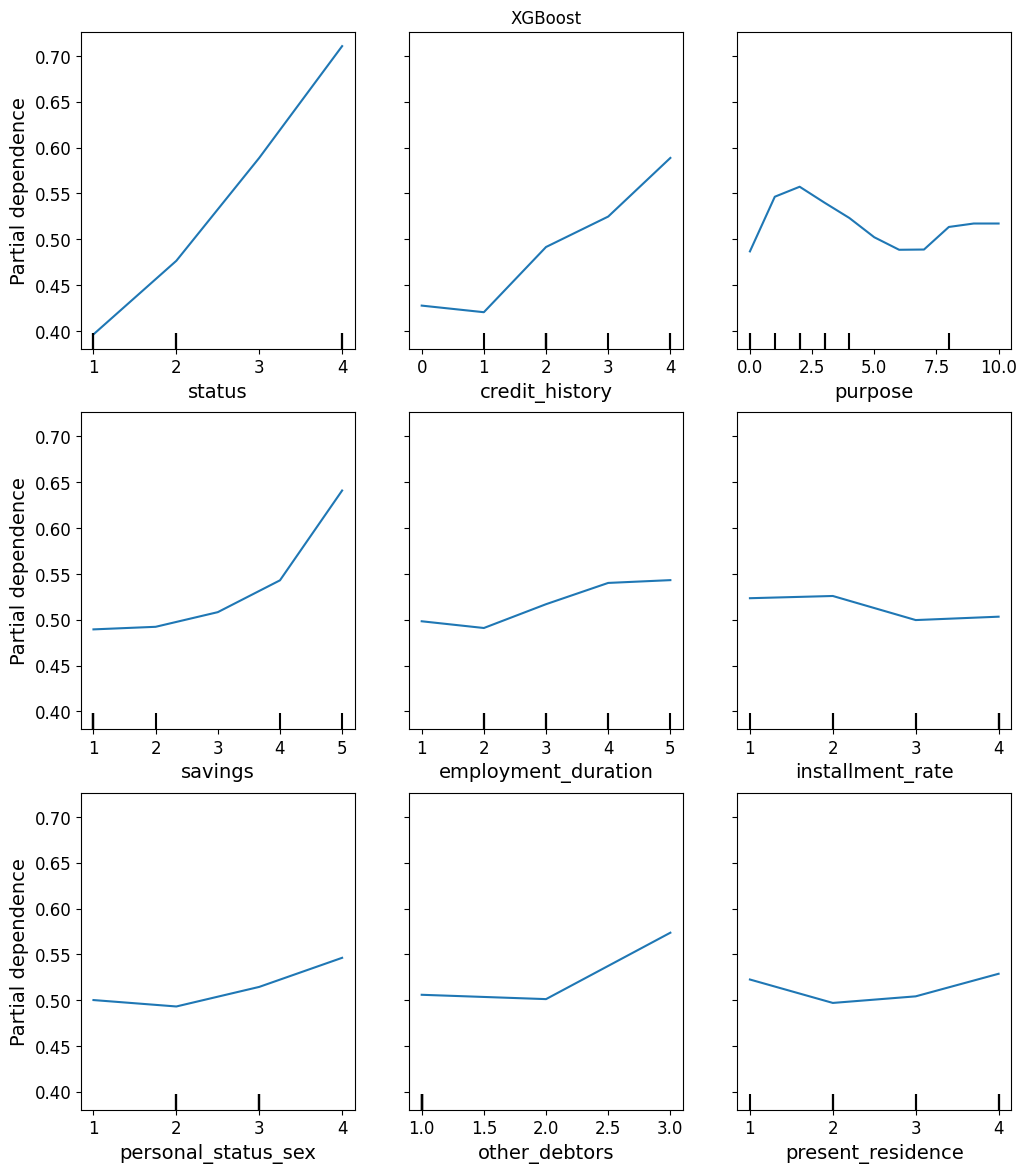

In [82]:
# Partial Dependence plot for XGBoost model (best model)
from sklearn.inspection import PartialDependenceDisplay
features =[0,1,2,3,4,5,6,7,8]
fig,ax = plt.subplots(figsize=(12,14))
ax.set_title("XGBoost")
PartialDependenceDisplay.from_estimator(xgb_clf,X_res,features,target=y_res,ax=ax)